In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

data_with_clusters = pd.read_csv('data/data_with_clusters.csv')
data_with_clusters['date'] = pd.to_datetime(data_with_clusters['date'])
data = data_with_clusters

In [72]:
# Метрики
metrics = {
    'Количество сообщений': len(data),
    'Количество слов': data['word_count'].sum(),
    'Количество фото': data['has_photo'].sum(),
    'Количество видео': data['has_video'].sum(),
    'Количество аудио': data['has_audio'].sum(),
    'Количество документов': data['has_document'].sum(),
    'Количество стикеров': data['has_is_sticker'].sum(),
    'Количество вопросов': data['is_question'].sum(),
    'Количество ответов': data['has_is_reply'].sum(),
    'Количество сообщений администратора': data['is_admin_post'].sum(),
    'Среднее количество слов в сообщении': data['word_count'].mean(),
    'Среднее количество букв в сообщении': data['char_count'].mean(),
    'Сколько в среднем фото на сообщение': data['has_photo'].mean(),
    'Сколько в среднем видео на сообщение': data['has_video'].mean(),
    'Сколько в среднем аудио на сообщение': data['has_audio'].mean(),
    'Сколько в среднем документов на сообщение': data['has_document'].mean(),
    'Сколько в среднем стикеров на сообщение': data['has_is_sticker'].mean(),
    'Сколько в среднем вопросов на сообщение': data['is_question'].mean(),
    'Сколько в среднем ответов на сообщение': data['has_is_reply'].mean(),
    'Сколько в среднем сообщений  администратора': data['is_admin_post'].mean(),

    'Соотношение вопросов и ответов': data['is_question'].sum() / data['has_is_reply'].sum() if data['has_is_reply'].sum() != 0 else float('inf')
}

metrics

{'Количество сообщений': 53938,
 'Количество слов': 652213,
 'Количество фото': 3350,
 'Количество видео': 81,
 'Количество аудио': 16,
 'Количество документов': 535,
 'Количество стикеров': 157,
 'Количество вопросов': 12113,
 'Количество ответов': 20841,
 'Количество сообщений администратора': 321,
 'Среднее количество слов в сообщении': 12.091901813192925,
 'Среднее количество букв в сообщении': 81.65434387630242,
 'Сколько в среднем фото на сообщение': 0.06210834662019356,
 'Сколько в среднем видео на сообщение': 0.0015017242018613964,
 'Сколько в среднем аудио на сообщение': 0.00029663687938002894,
 'Сколько в среднем документов на сообщение': 0.009918795654269718,
 'Сколько в среднем стикеров на сообщение': 0.002910749378916534,
 'Сколько в среднем вопросов на сообщение': 0.22457265749564315,
 'Сколько в среднем ответов на сообщение': 0.38638807519744894,
 'Сколько в среднем сообщений  администратора': 0.00595127739256183,
 'Соотношение вопросов и ответов': 0.5812101146777986}

{'Фото': 3350, 'Видео': 81, 'Аудио': 16, 'Документ': 535, 'Стикер': 157}


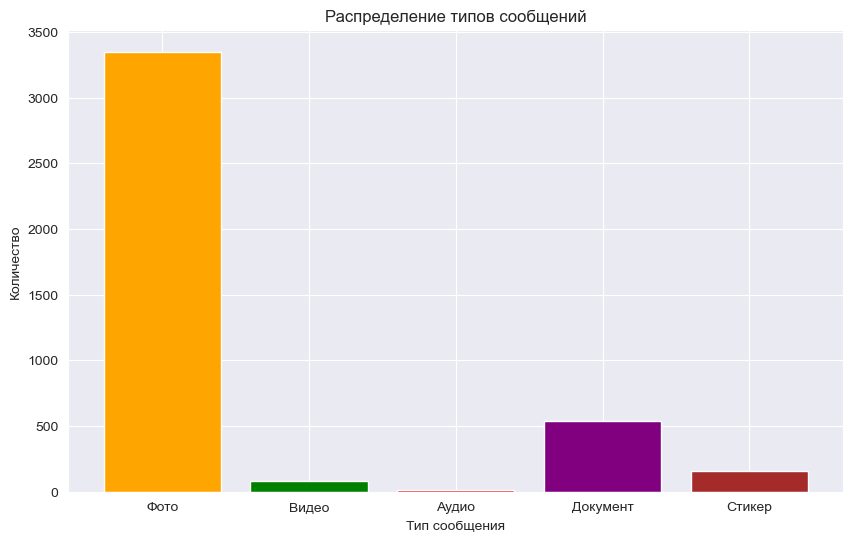

{'Вопросов': 12113, 'Ответов': 20841, 'Администратор': 321}


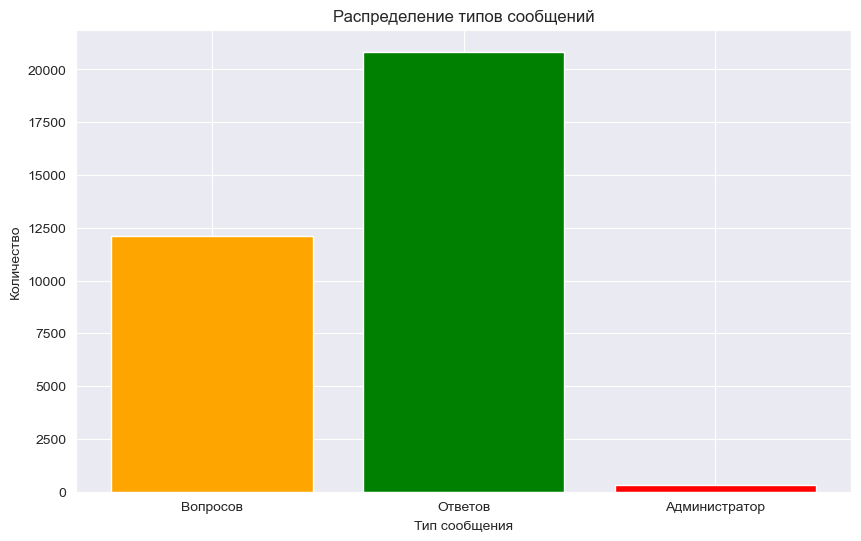

In [73]:
# Подсчет количества каждого типа сообщений
message_types = {
    'Фото': data['has_photo'].sum(),
    'Видео': data['has_video'].sum(),
    'Аудио': data['has_audio'].sum(),
    'Документ': data['has_document'].sum(),
    'Стикер': data['has_is_sticker'].sum()
}
print(message_types)
# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(message_types.keys(), message_types.values(), color=['orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Тип сообщения')
plt.ylabel('Количество')
plt.title('Распределение типов сообщений')
plt.show()

# Подсчет количества каждого типа сообщений
message_types = {
    'Вопросов': data['is_question'].sum(),
    'Ответов': data['has_is_reply'].sum(),
    'Администратор': data['is_admin_post'].sum(),

}
print(message_types)
# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(message_types.keys(), message_types.values(), color=['orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Тип сообщения')
plt.ylabel('Количество')
plt.title('Распределение типов сообщений')
plt.show()

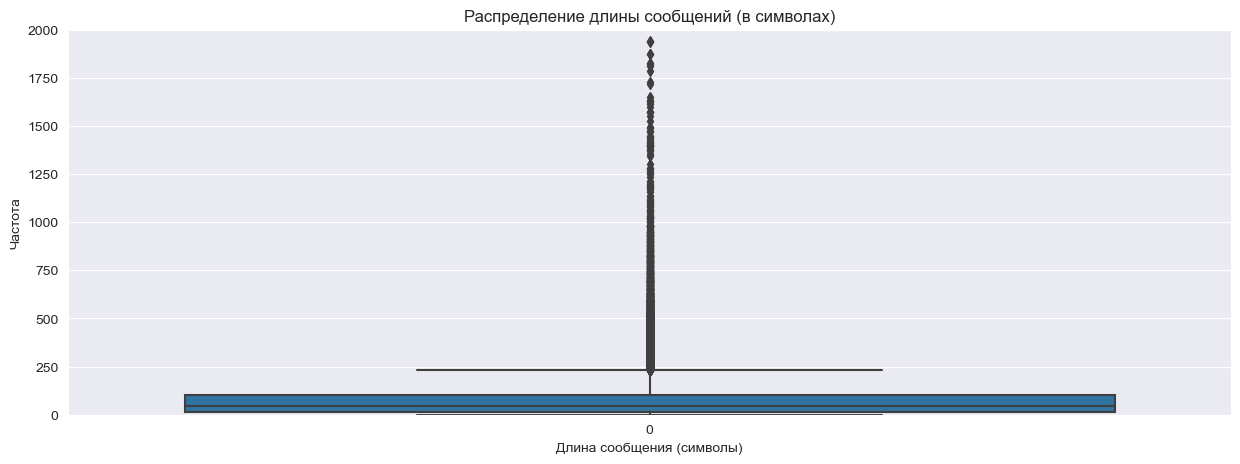

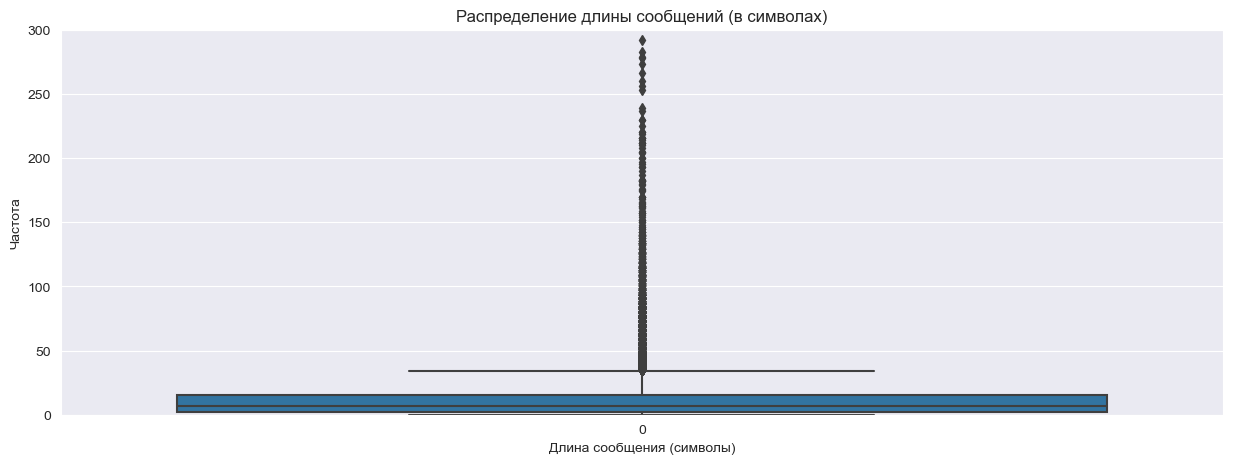

In [74]:
# Распределение длины сообщений
plt.figure(figsize=(15, 5))
sns.boxplot(data['char_count'])
plt.title('Распределение длины сообщений (в символах)')
plt.xlabel('Длина сообщения (символы)')
plt.ylabel('Частота')
plt.ylim(0, 2000)  # Ограничиваем ось иксов до 2000 символов

plt.show()

# Распределение длины сообщений
plt.figure(figsize=(15, 5))
sns.boxplot(data['word_count'])
plt.title('Распределение длины сообщений (в символах)')
plt.xlabel('Длина сообщения (символы)')
plt.ylabel('Частота')
plt.ylim(0, 300)  # Ограничиваем ось иксов до 2000 символов

plt.show()

Корреляция между количеством сообщений от администратора и общим количеством сообщений: 0.20433907461498446


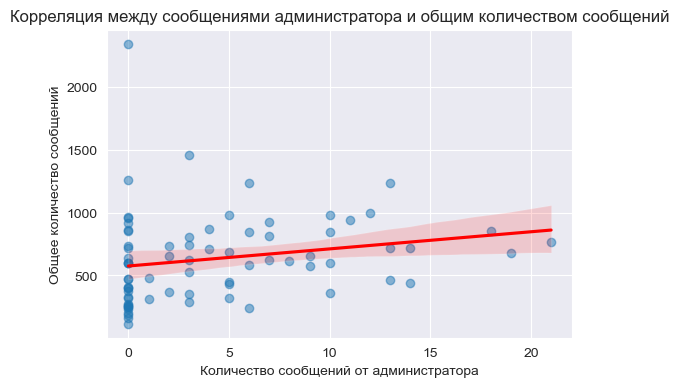

In [75]:
# Преобразуем дату в период недели
data['week'] = data['date'].dt.to_period('M')

# Агрегируем данные по неделям
weekly_data = data.groupby('week').agg(
    total_messages=('message', 'count'),
    admin_messages=('is_admin_post', 'sum')
).reset_index()

# Рассчитываем корреляцию
correlation = weekly_data['total_messages'].corr(weekly_data['admin_messages'])

print(f"Корреляция между количеством сообщений от администратора и общим количеством сообщений: {correlation}")

# Визуализация
plt.figure(figsize=(6, 4))
sns.regplot(x='admin_messages', y='total_messages', data=weekly_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Количество сообщений от администратора')
plt.ylabel('Общее количество сообщений')
plt.title('Корреляция между сообщениями администратора и общим количеством сообщений')
plt.show()

In [111]:
# Расширенный список стоп-слов
stop_words = {'и', 'в', 'на', 'с', 'что', 'как', 'это', 'а', 'по', 'к', 'у', 'из', 'для', 'за', 'от', 'о', 'же', 'но', 'да', 'нет',
              'бы', 'вы', 'он', 'она', 'они', 'мы', 'ты', 'его', 'ее', 'их', 'мне', 'тебе', 'ему', 'ей', 'им', 'нас', 'вас', 'меня',
              'тебя', 'мой', 'твой', 'наш', 'ваш', 'свой', 'который', 'которые', 'которое', 'которую', 'которых','не','то','я','если','можно','есть','так','все','или','будет','com','https','через','чтобы','может','только','при','ru','вот','уже','ли'}

# Найти все слова в сообщениях
words = re.findall(r'\b\w+\b', ' '.join(data['message'].dropna()).lower())
words = [word for word in words if word not in stop_words]
common_words = Counter(words).most_common(10)

print("Самые популярные слова:", common_words)

Самые популярные слова: [('aimylogic', 3168), ('бота', 2986), ('спасибо', 2936), ('бот', 2915), ('добрый', 2393), ('день', 2206), ('нужно', 2011), ('сделать', 1998), ('просто', 1674), ('работает', 1611)]


In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
messages_per_month = data_with_clusters['date'].dt.to_period('W').value_counts().sort_index()
print(f"Частота сообщений в месяц:\n{messages_per_month}")


# Преобразование в DataFrame для декомпозиции
messages_per_month_df = messages_per_month.to_timestamp().to_frame(name='count')
# Преобразование в DataFrame для декомпозиции
# Декомпозиция временного ряда
decomposition = seasonal_decompose(messages_per_month_df['count'], model='additive')

# Визуализация декомпозиции
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(messages_per_month_df, label='Original')
plt.legend(loc='best')
plt.title('Оригинальный временной ряд')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Тренд')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Сезонная составляющая')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Остатки')

plt.tight_layout()
plt.show()

Частота сообщений в месяц:
date
2018-05-21/2018-05-27      6
2018-05-28/2018-06-03    224
2018-06-04/2018-06-10     79
2018-06-11/2018-06-17     45
2018-06-18/2018-06-24     43
                        ... 
2024-05-06/2024-05-12     65
2024-05-13/2024-05-19     66
2024-05-20/2024-05-26    123
2024-05-27/2024-06-02    187
2024-06-03/2024-06-09    166
Freq: W-SUN, Name: count, Length: 316, dtype: int64


date
2018-05-21/2018-05-27      6
2018-05-28/2018-06-03    224
2018-06-04/2018-06-10     79
2018-06-11/2018-06-17     45
2018-06-18/2018-06-24     43
                        ... 
2024-05-06/2024-05-12     65
2024-05-13/2024-05-19     66
2024-05-20/2024-05-26    123
2024-05-27/2024-06-02    187
2024-06-03/2024-06-09    166
Freq: W-SUN, Name: count, Length: 316, dtype: int64

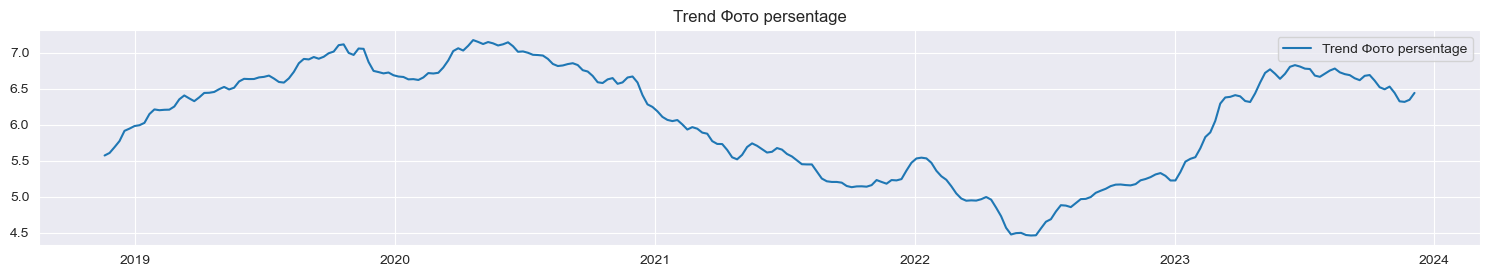

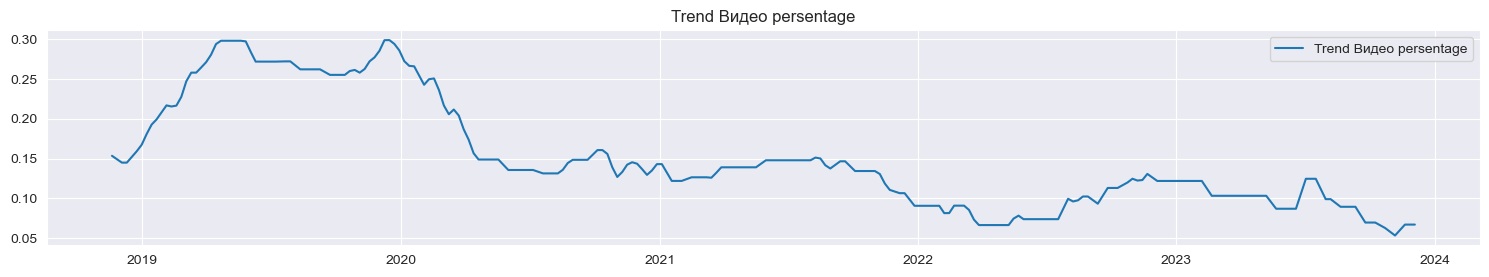

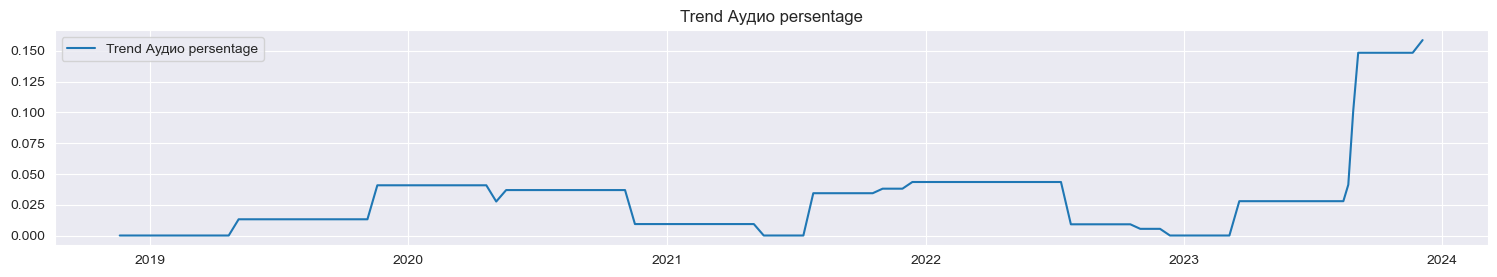

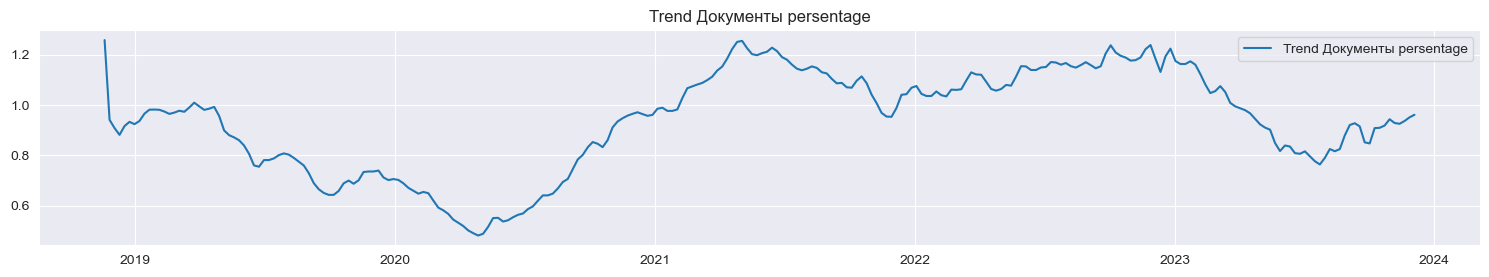

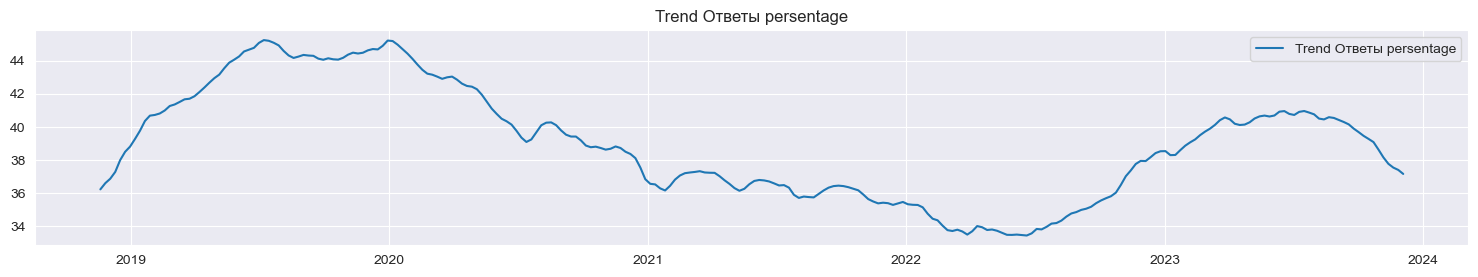

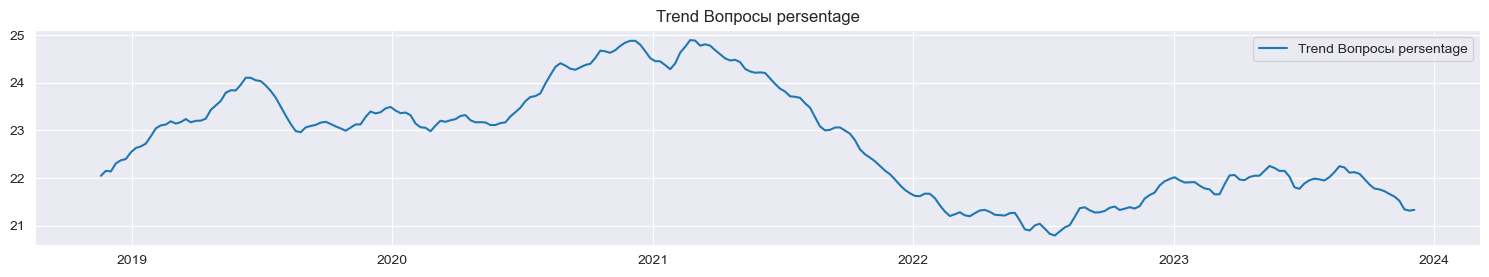

In [100]:


# Функция для расчета процента типов сообщений по времени
def calculate_percentage_over_time(df, column_name):
    df['week'] = df['date'].dt.to_period('W')
    total_messages_per_week = df['week'].value_counts().sort_index()
    messages_with_feature_per_week = df[df[column_name] == 1]['week'].value_counts().sort_index()
    percentage_per_week = (messages_with_feature_per_week / total_messages_per_week) * 100
    return percentage_per_week.fillna(0).to_timestamp()

# Расчет процентов
photo_percentage = calculate_percentage_over_time(data, 'has_photo')
video_percentage = calculate_percentage_over_time(data, 'has_video')
audio_percentage = calculate_percentage_over_time(data, 'has_audio')
document_percentage = calculate_percentage_over_time(data, 'has_document')
reply_percentage = calculate_percentage_over_time(data, 'has_is_reply')
question_percentage = calculate_percentage_over_time(data, 'is_question')

# Функция для декомпозиции временного ряда и визуализации
def decompose_and_plot(percentage_series, title):
    decomposition = seasonal_decompose(percentage_series, model='additive')

    plt.figure(figsize=(15, 10))
    # 
    # plt.subplot(4, 1, 1)
    # plt.plot(percentage_series, label='Original')
    # plt.legend(loc='best')
    # plt.title(f'Оригинальный временной ряд: {title}')

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label=f'Trend {title} persentage')
    plt.legend(loc='best')
    plt.title(f'Trend {title} persentage')
    # 
    # plt.subplot(4, 1, 3)
    # plt.plot(decomposition.seasonal, label='Seasonality')
    # plt.legend(loc='best')
    # plt.title('Сезонная составляющая')
    # 
    # plt.subplot(4, 1, 4)
    # plt.plot(decomposition.resid, label='Residuals')
    # plt.legend(loc='best')
    # plt.title('Остатки')

    plt.tight_layout()
    plt.show()

# Декомпозиция и визуализация для каждого типа сообщений
decompose_and_plot(photo_percentage, 'Фото')
decompose_and_plot(video_percentage, 'Видео')
decompose_and_plot(audio_percentage, 'Аудио')
decompose_and_plot(document_percentage, 'Документы')
decompose_and_plot(reply_percentage, 'Ответы')
decompose_and_plot(question_percentage, 'Вопросы')

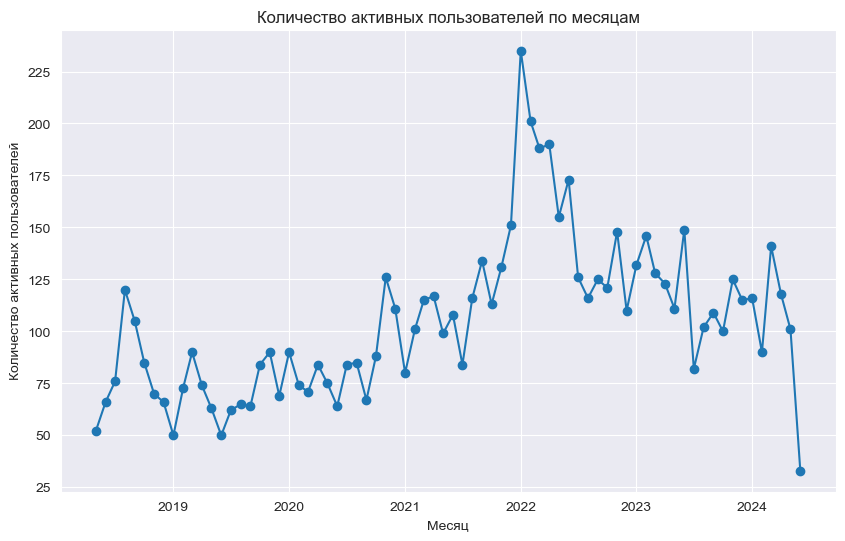

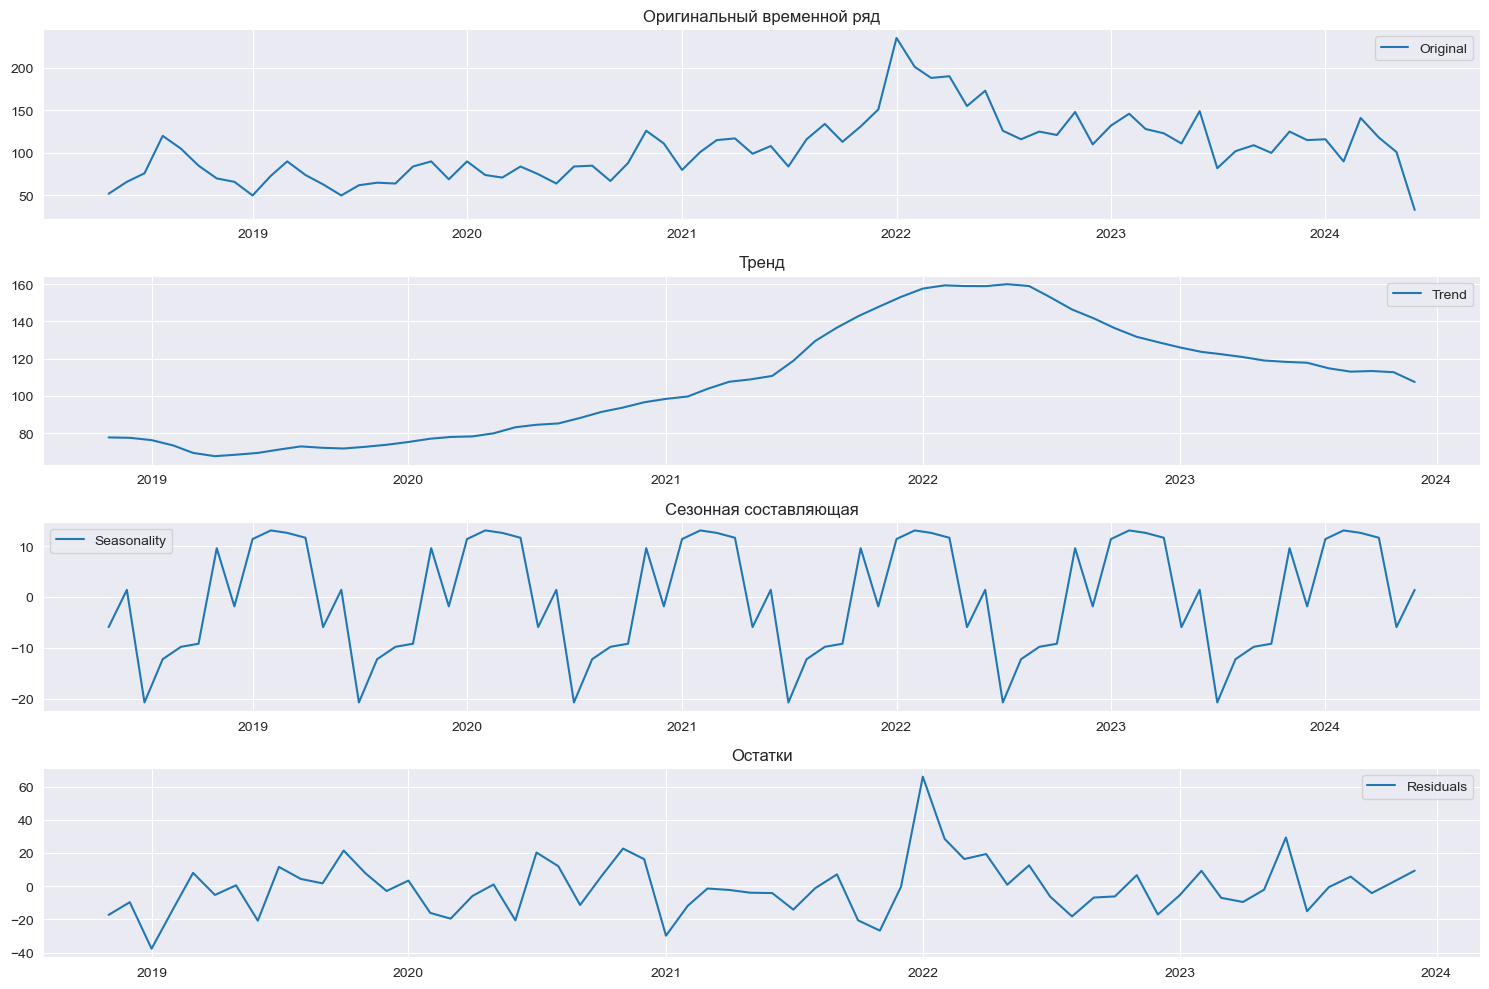

In [101]:
# Преобразуем дату в период месяца
data['month'] = data['date'].dt.to_period('M')

# Группируем данные по месяцам и пользователям и считаем количество сообщений
monthly_user_activity = data.groupby(['month', 'sender_id']).size().reset_index(name='message_count')

# Определяем, какие пользователи активны в каждом месяце (имеют хотя бы одно сообщение)
monthly_user_activity['is_active'] = monthly_user_activity['message_count'] > 0

# Группируем данные по месяцам и считаем количество активных пользователей
active_users_per_month = monthly_user_activity.groupby('month')['is_active'].sum().reset_index()

# Преобразуем период месяца в дату для удобства построения графика
active_users_per_month['month'] = active_users_per_month['month'].dt.to_timestamp()

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(active_users_per_month['month'], active_users_per_month['is_active'], marker='o')
plt.xlabel('Месяц')
plt.ylabel('Количество активных пользователей')
plt.title('Количество активных пользователей по месяцам')
plt.grid(True)
plt.show()

# Декомпозиция временного ряда
active_users_series = active_users_per_month.set_index('month')['is_active']
decomposition = seasonal_decompose(active_users_series, model='additive')

# Визуализация декомпозиции
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')
plt.title('Оригинальный временной ряд')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Тренд')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Сезонная составляющая')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Остатки')

plt.tight_layout()
plt.show()


Корреляция между количеством живых пользователей и количеством сообщений администратора: 0.15614268953629326


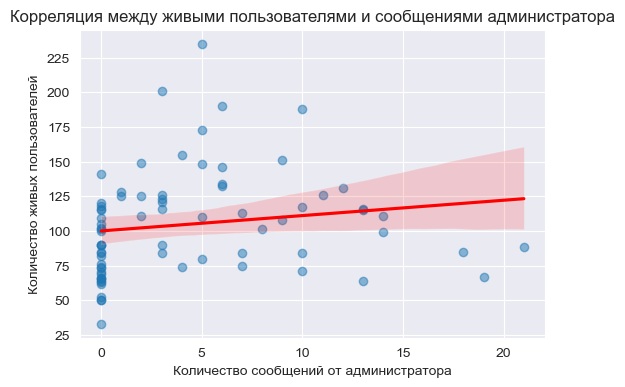

In [79]:
# Преобразуем дату в период месяца
data['month'] = data['date'].dt.to_period('M')

# Агрегируем данные по месяцам
monthly_data = data.groupby('month').agg(
    total_messages=('message', 'count'),
    admin_messages=('is_admin_post', 'sum')
).reset_index()
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()

# Объединяем данные по активным пользователям и сообщениям администратора
merged_data = monthly_data.merge(active_users_per_month, on='month')
# Рассчитываем корреляцию между количеством живых пользователей и количеством сообщений администратора
correlation = merged_data['is_active'].corr(merged_data['admin_messages'])
print(f"Корреляция между количеством живых пользователей и количеством сообщений администратора: {correlation}")

# Визуализация
plt.figure(figsize=(6, 4))
sns.regplot(x='admin_messages', y='is_active', data=merged_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Количество сообщений от администратора')
plt.ylabel('Количество живых пользователей')
plt.title('Корреляция между живыми пользователями и сообщениями администратора')
plt.show()

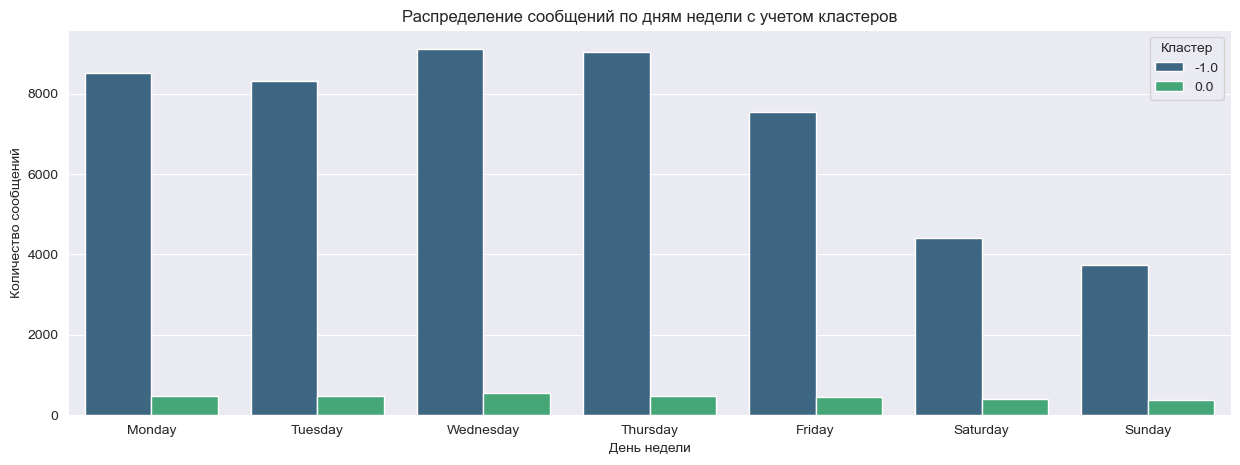

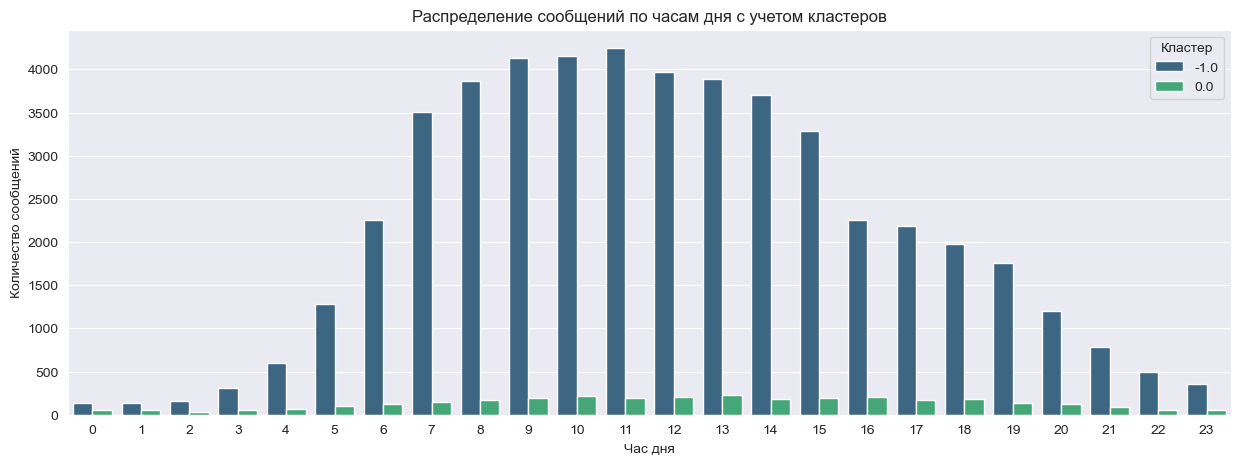

In [80]:
data_with_clusters = data_with_clusters  # Ваш DataFrame с кластерами

# Добавим столбец с днем недели
data_with_clusters['day_of_week'] = data_with_clusters['date'].dt.day_name()

# Построим распределение сообщений по дням недели с учетом кластеров
plt.figure(figsize=(15, 5))
sns.countplot(data=data_with_clusters, x='day_of_week', hue='cluster', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Распределение сообщений по дням недели с учетом кластеров')
plt.xlabel('День недели')
plt.ylabel('Количество сообщений')
plt.legend(title='Кластер')
plt.show()
# Добавим столбец с часом дня
data_with_clusters['hour'] = data_with_clusters['date'].dt.hour

# Построим распределение сообщений по часам дня с учетом кластеров
plt.figure(figsize=(15, 5))
sns.countplot(data=data_with_clusters, x='hour', hue='cluster', palette='viridis')
plt.title('Распределение сообщений по часам дня с учетом кластеров')
plt.xlabel('Час дня')
plt.ylabel('Количество сообщений')
plt.legend(title='Кластер')
plt.show()

Сентимент анализа:
sentiment
1 star     17446
5 stars    11845
3 stars     8200
neutral     6999
4 stars     5283
2 stars     4165
Name: count, dtype: int64


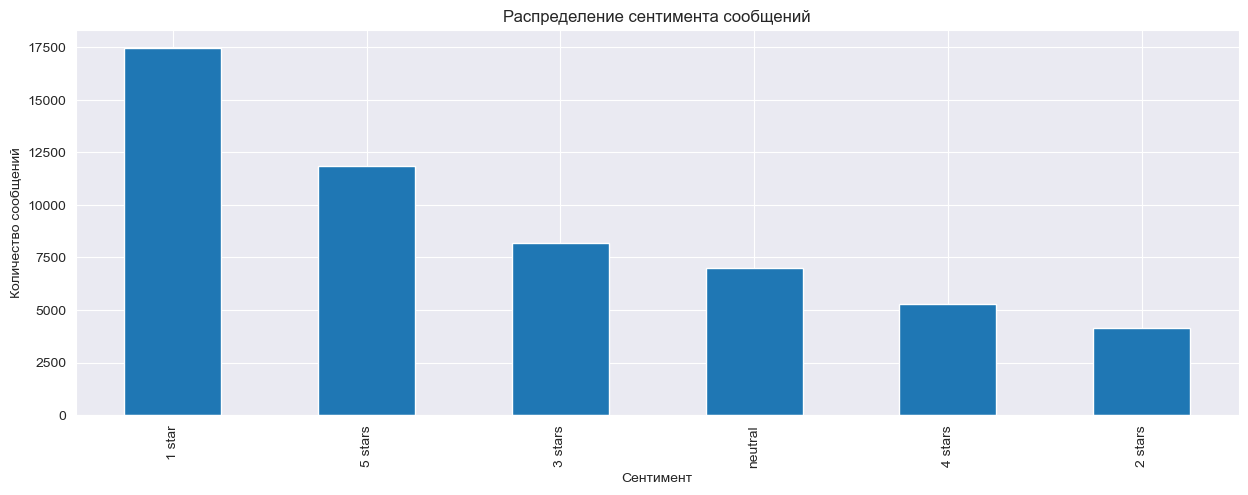

In [102]:
sentiment_counts = data_with_clusters['sentiment'].value_counts()
print(f"Сентимент анализа:\n{sentiment_counts}")
# Распределение сентимента сообщений
plt.figure(figsize=(15, 5))
sentiment_counts.plot(kind='bar')
plt.title('Распределение сентимента сообщений')
plt.xlabel('Сентимент')
plt.ylabel('Количество сообщений')
plt.show()

In [86]:
import pandas as pd
user_data = pd.read_csv('data/user_data.csv')
user_data

,sender_id,message_count,avg_char_count,total_char_count,avg_word_count,total_word_count,avg_photo,total_photo,avg_video,total_video,...,total_is_reply,is_active,most_active_hour,neutral_messages,1star_messages,2star_messages,3star_messages,4star_messages,5star_messages,cluster
0,-1.001980e+12,1,1.0,1,1.0,1,0.0,0,0.0,0,...,1,0,14,0,0,0,0,0,1,-1
1,-1.001740e+12,1,34.0,34,6.0,6,0.0,0,0.0,0,...,1,0,12,0,0,0,0,0,1,-1
2,-1.001725e+12,2,7.5,15,1.5,3,0.0,0,0.0,0,...,1,0,15,0,0,0,0,1,1,-1
3,-1.001612e+12,1,117.0,117,17.0,17,0.0,0,0.0,0,...,0,0,2,0,1,0,0,0,0,-1
4,-1.001462e+12,2,32.0,64,1.5,3,0.0,0,0.0,0,...,2,0,18,0,0,0,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,7.173291e+09,1,0.0,0,0.0,0,0.0,0,0.0,0,...,0,1,12,1,0,0,0,0,0,-1
5024,7.182824e+09,1,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0,10,1,0,0,0,0,0,0
5025,7.187692e+09,1,0.0,0,0.0,0,0.0,0,0.0,0,...,0,1,17,1,0,0,0,0,0,-1
5026,7.188730e+09,1,0.0,0,0.0,0,0.0,0,0.0,0,...,0,1,9,1,0,0,0,0,0,-1


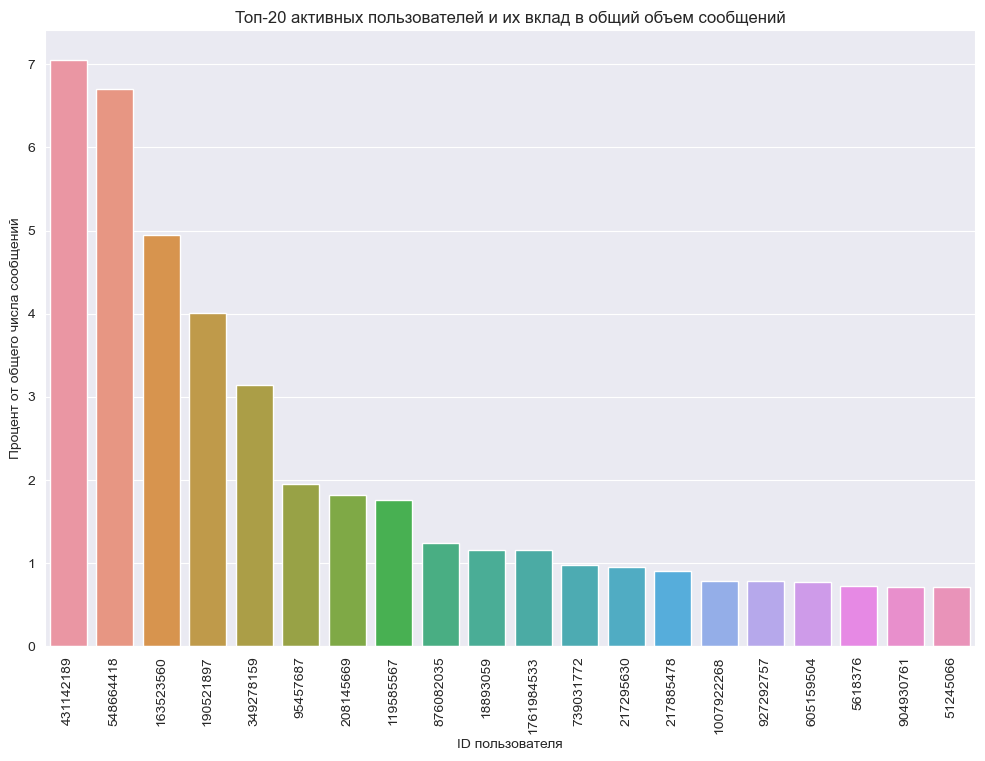

Процент пользователей, которые создают 90% сообщений: 20.84%


In [87]:
# Определяем топ-20 активных пользователей по количеству сообщений
top_20_users = user_data.nlargest(20, 'message_count')
top_20_users['sender_id'] = top_20_users['sender_id'].astype(int)
top_20_users['sender_id'] = top_20_users['sender_id'].astype(str)
# Считаем общий объем сообщений
total_messages = user_data['message_count'].sum()
# Считаем вклад топ-20 пользователей в общий объем сообщений
top_20_users['message_percentage'] = (top_20_users['message_count'] / total_messages) * 100

# Сортируем топ-20 пользователей по их вкладу в общий объем сообщений
top_20_users = top_20_users.sort_values(by='message_percentage', ascending=False)


# Визуализируем топ-20 активных пользователей и их вклад
plt.figure(figsize=(12, 8))
sns.barplot(x='sender_id', y='message_percentage', data=top_20_users)
plt.xlabel('ID пользователя')
plt.ylabel('Процент от общего числа сообщений')
plt.title('Топ-20 активных пользователей и их вклад в общий объем сообщений')
plt.xticks(rotation=90)
plt.show()

# Рассчитываем процент пользователей, которые создают 90% сообщений
user_features_sorted = user_data.sort_values(by='message_count', ascending=False)
user_features_sorted['cumulative_percentage'] = (user_features_sorted['message_count'].cumsum() / total_messages) * 100
ninety_percent_users = user_features_sorted[user_features_sorted['cumulative_percentage'] <= 90]

# Процент пользователей, которые создают 90% сообщений
percent_users_90 = (len(ninety_percent_users) / len(user_data)) * 100

print(f"Процент пользователей, которые создают 90% сообщений: {percent_users_90:.2f}%")

In [104]:
data_with_clusters.columns

Index(['date', 'sender_id', 'message', 'char_count', 'word_count', 'has_photo',
       'has_video', 'has_audio', 'has_document', 'has_is_reply',
       'has_is_sticker', 'sentiment', 'is_question', 'is_admin_post',
       'cluster', 'week', 'month', 'day_of_week', 'hour'],
      dtype='object')